In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
# Implementing Upper Confidence Bound
import random

In [4]:
N = 10000
d = 10
ads_selected = []
no_of_rewards_1 = [0] * d
no_of_rewards_0 = [0] * d
total_reward = 0

In [7]:
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        beta_random = random.betavariate(
            no_of_rewards_1[i] + 1,
            no_of_rewards_0[i] + 1
        )
        if beta_random > max_random:
            max_random = beta_random
            ad = i
        ads_selected.append(ad)
        reward = data.values[n, ad]

        if reward == 1:
            no_of_rewards_1[ad] += 1
        else:
            no_of_rewards_0[ad] += 1

        total_reward += reward
print(total_reward)

45735


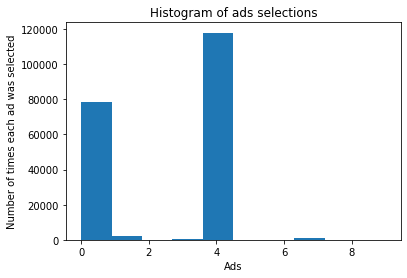

In [8]:
#Visualing the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()